In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
np.array2string(np.arange(12), precision=2, threshold=6, edgeitems=3)

'[ 0  1  2 ...  9 10 11]'

In [7]:
g.grid

Grid(
Axis("x",
points = None,
edges = array([[ 0.,  1.],
       [ 1.,  2.],
       [ 2.,  3.],
       [ 3.,  4.],
       [ 4.,  5.],
       [ 5.,  6.],
       [ 6.,  7.],
       [ 7.,  8.],
       [ 8.,  9.],
       [ 9., 10.]]))
nbins = 10),)

In [8]:
g['b'] = np.arange(30).reshape(10,-1)

In [9]:
g

x,[0. 1.],[1. 2.],[2. 3.],[3. 4.],[4. 5.],[5. 6.],[6. 7.],[7. 8.],[8. 9.],[ 9. 10.]
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [10]:
g.flat('b')

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [11]:
g.grid.size

10

In [12]:
g

x,[0. 1.],[1. 2.],[2. 3.],[3. 4.],[4. 5.],[5. 6.],[6. 7.],[7. 8.],[8. 9.],[ 9. 10.]
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [13]:
g['b'].ndim

2

In [14]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [15]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [16]:
g.grid.vars

['x', 'y']

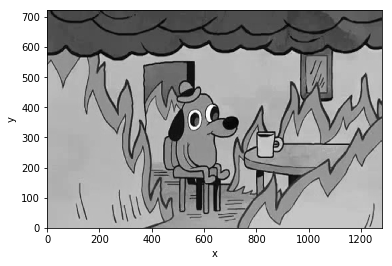

In [17]:
g.plot('bw', cmap='gray')

In [18]:
g['img'].ndim

3

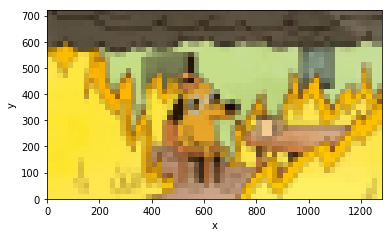

In [19]:
g.binwise(function=np.mean, x=0.05, y=0.05).plot('img')

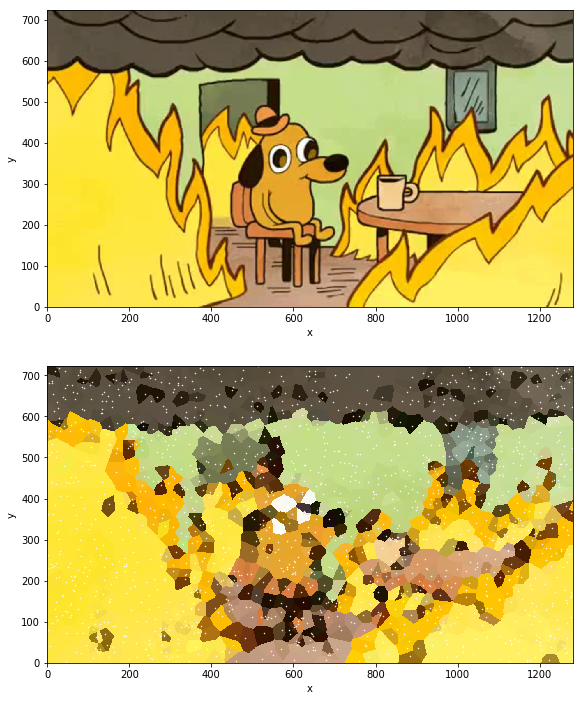

In [22]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges.max(), y=np.random.rand(N)*g.grid['y'].edges.max())
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

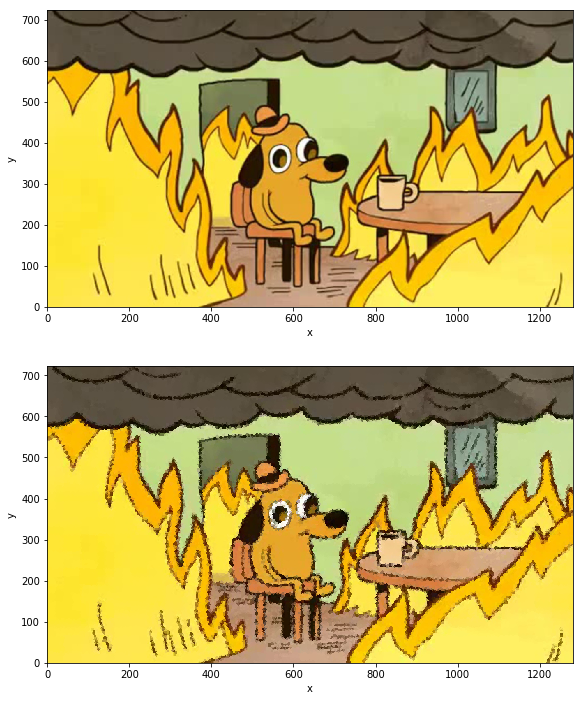

In [23]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=50000
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges.max()
pd['y'] = np.random.rand(N)*g.grid['y'].edges.max()
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


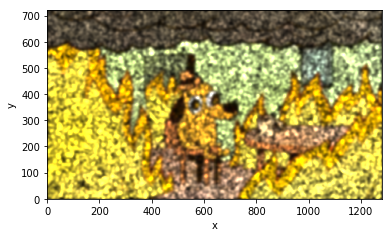

In [24]:
pk = pd.kde(x=1000, y=1000, bw=5, density=False, kernel='gaussian')
pk['img'] /= np.max(pk['img']) / 2
#pk['img_exp'] = np.exp(pk['img'])
#pk['img_exp'] /= np.max(pk['img_exp'])
pk.plot('img')



In [25]:
pk[0:10, 0:10]

y \ x,[0.08 1.36],[1.36 2.64],[2.64 3.92],[3.92 5.2 ],[5.2 6.48],[6.48 7.76],[7.76 9.04],[ 9.04 10.32],[10.32 11.6 ],[11.6 12.88]
[0. 0.73],img = [0.19 0.17 0.05]counts = 0.011,img = [0.22 0.2 0.06]counts = 0.013,img = [0.25 0.23 0.07]counts = 0.015,img = [0.27 0.25 0.08]counts = 0.016,img = [0.29 0.26 0.08]counts = 0.017,img = [0.3 0.27 0.08]counts = 0.017,img = [0.31 0.28 0.09]counts = 0.018,img = [0.32 0.29 0.09]counts = 0.018,img = [0.33 0.3 0.09]counts = 0.019,img = [0.34 0.31 0.09]counts = 0.02
[0.73 1.45],img = [0.2 0.18 0.06]counts = 0.012,img = [0.24 0.21 0.07]counts = 0.014,img = [0.27 0.24 0.07]counts = 0.015,img = [0.29 0.27 0.08]counts = 0.017,img = [0.31 0.28 0.09]counts = 0.018,img = [0.33 0.3 0.09]counts = 0.019,img = [0.34 0.31 0.09]counts = 0.02,img = [0.35 0.31 0.1 ]counts = 0.02,img = [0.36 0.32 0.1 ]counts = 0.021,img = [0.38 0.34 0.1 ]counts = 0.022
[1.45 2.17],img = [0.21 0.19 0.06]counts = 0.012,img = [0.25 0.22 0.07]counts = 0.014,img = [0.28 0.26 0.08]counts = 0.016,img = [0.31 0.28 0.09]counts = 0.018,img = [0.34 0.3 0.09]counts = 0.019,img = [0.35 0.32 0.1 ]counts = 0.02,img = [0.37 0.33 0.1 ]counts = 0.021,img = [0.38 0.34 0.1 ]counts = 0.022,img = [0.39 0.35 0.11]counts = 0.023,img = [0.41 0.37 0.11]counts = 0.024
[2.17 2.89],img = [0.22 0.2 0.06]counts = 0.013,img = [0.26 0.23 0.07]counts = 0.015,img = [0.3 0.27 0.08]counts = 0.017,img = [0.33 0.3 0.09]counts = 0.019,img = [0.36 0.32 0.1 ]counts = 0.021,img = [0.38 0.34 0.1 ]counts = 0.022,img = [0.39 0.36 0.11]counts = 0.023,img = [0.41 0.37 0.11]counts = 0.024,img = [0.42 0.38 0.12]counts = 0.024,img = [0.44 0.4 0.12]counts = 0.026
[2.89 3.61],img = [0.22 0.2 0.06]counts = 0.013,img = [0.27 0.24 0.07]counts = 0.015,img = [0.31 0.28 0.09]counts = 0.018,img = [0.35 0.31 0.1 ]counts = 0.02,img = [0.38 0.34 0.1 ]counts = 0.022,img = [0.4 0.36 0.11]counts = 0.023,img = [0.42 0.38 0.12]counts = 0.024,img = [0.44 0.4 0.12]counts = 0.025,img = [0.45 0.41 0.13]counts = 0.026,img = [0.47 0.43 0.13]counts = 0.027
[3.61 4.34],img = [0.23 0.21 0.06]counts = 0.013,img = [0.28 0.25 0.08]counts = 0.016,img = [0.32 0.29 0.09]counts = 0.019,img = [0.36 0.33 0.1 ]counts = 0.021,img = [0.4 0.36 0.11]counts = 0.023,img = [0.43 0.39 0.12]counts = 0.025,img = [0.45 0.41 0.12]counts = 0.026,img = [0.47 0.42 0.13]counts = 0.027,img = [0.48 0.44 0.13]counts = 0.028,img = [0.51 0.46 0.14]counts = 0.029
[4.34 5.06],img = [0.24 0.22 0.07]counts = 0.014,img = [0.29 0.26 0.08]counts = 0.017,img = [0.34 0.3 0.09]counts = 0.019,img = [0.38 0.35 0.11]counts = 0.022,img = [0.42 0.38 0.12]counts = 0.024,img = [0.45 0.41 0.13]counts = 0.026,img = [0.48 0.43 0.13]counts = 0.028,img = [0.5 0.45 0.14]counts = 0.029,img = [0.51 0.47 0.14]counts = 0.03,img = [0.54 0.49 0.15]counts = 0.031
[5.06 5.78],img = [0.25 0.22 0.07]counts = 0.014,img = [0.3 0.27 0.08]counts = 0.017,img = [0.35 0.32 0.1 ]counts = 0.02,img = [0.4 0.36 0.11]counts = 0.023,img = [0.44 0.4 0.12]counts = 0.026,img = [0.48 0.43 0.13]counts = 0.028,img = [0.51 0.46 0.14]counts = 0.029,img = [0.53 0.48 0.15]counts = 0.031,img = [0.55 0.49 0.15]counts = 0.032,img = [0.57 0.51 0.16]counts = 0.033
[5.78 6.5 ],img = [0.26 0.23 0.07]counts = 0.015,img = [0.31 0.28 0.09]counts = 0.018,img = [0.37 0.33 0.1 ]counts = 0.021,img = [0.42 0.38 0.12]counts = 0.024,img = [0.47 0.42 0.13]counts = 0.027,img = [0.51 0.46 0.14]counts = 0.029,img = [0.54 0.49 0.15]counts = 0.031,img = [0.56 0.51 0.15]counts = 0.032,img = [0.58 0.52 0.16]counts = 0.033,img = [0.6 0.54 0.17]counts = 0.035
[6.5 7.22],img = [0.27 0.24 0.07]counts = 0.015,img = [0.33 0.3 0.09]counts = 0.019,img = [0.39 0.35 0.11]counts = 0.022,img = [0.44 0.4 0.12]counts = 0.026,img = [0.49 0.45 0.14]counts = 0.029,img = [0.54 0.48 0.15]counts = 0.031,img = [0.57 0.51 0.16]counts = 0.033,img = [0.59 0.53 0.16]counts = 0.034,img = [0.61 0.55 0.17]counts = 0.035,img = [0.63 0.57 0.17]counts = 0.036


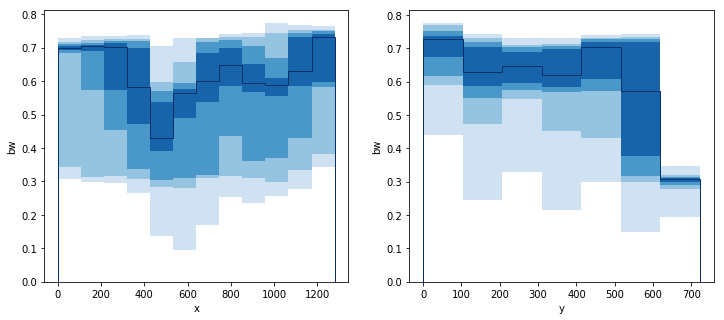

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

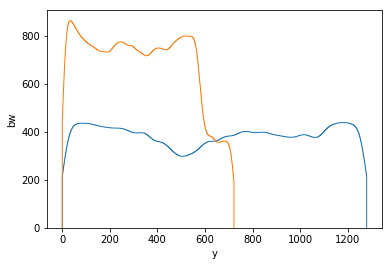

In [27]:
#g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde(x=1000, density=False).plot('bw')
g.kde(y=1000, density=False).plot('bw')

In [28]:
g['img'].shape

(1280, 722, 3)

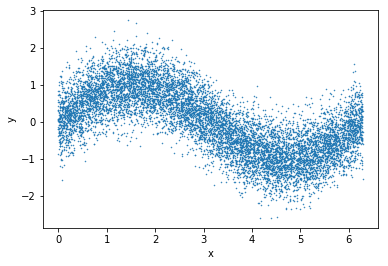

In [34]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(len(p)) * 0.5
p.plot('.', ms=1)

In [35]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

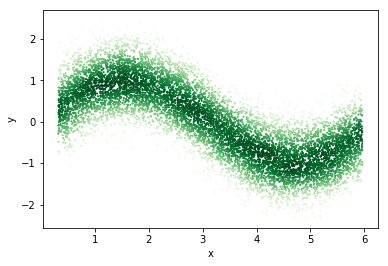

In [36]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

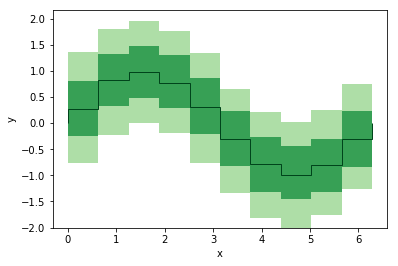

In [37]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

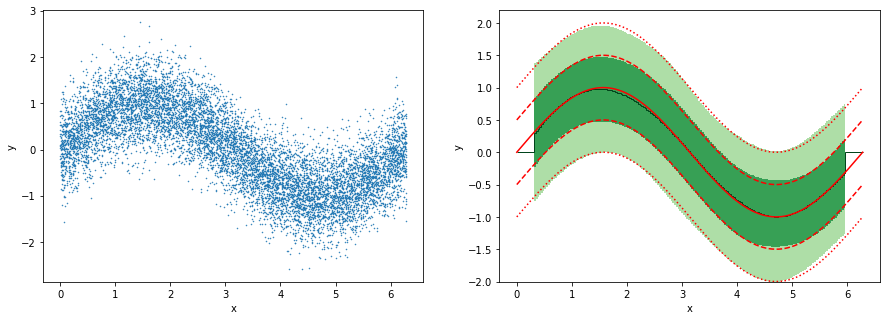

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='cubic').plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

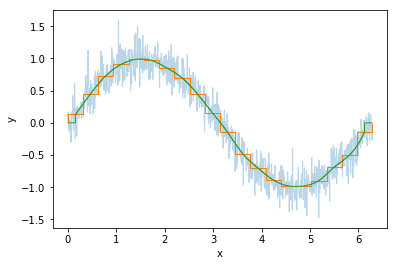

In [39]:
p.binwise(method='mean', x=1000).plot('y', alpha=0.3)
p.binwise(method='mean', x=20).plot('y')
p.binwise(method='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [40]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

needs to be checked, is weird behaviour
needs to be checked, is weird behaviour


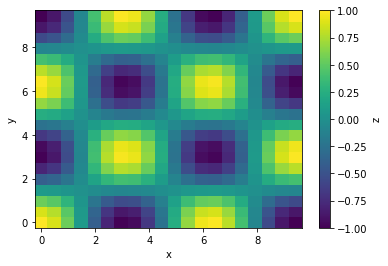

In [41]:
s.plot(cbar=True)

In [43]:
s['z']

y \ x,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
[-0.25 0.25],1,0.88,0.55,0.083,-0.4,-0.79,-0.99,-0.95,-0.68,-0.25,0.25,0.68,0.95,0.99,0.79,0.4,-0.083,-0.55,-0.88,-1
[0.25 0.74],0.88,0.77,0.48,0.073,-0.35,-0.69,-0.87,-0.83,-0.6,-0.22,0.22,0.6,0.83,0.87,0.69,0.35,-0.073,-0.48,-0.77,-0.88
[0.74 1.24],0.55,0.48,0.3,0.045,-0.22,-0.43,-0.54,-0.52,-0.37,-0.13,0.13,0.37,0.52,0.54,0.43,0.22,-0.045,-0.3,-0.48,-0.55
[1.24 1.74],0.083,0.073,0.045,0.0068,-0.033,-0.065,-0.081,-0.078,-0.056,-0.02,0.02,0.056,0.078,0.081,0.065,0.033,-0.0068,-0.045,-0.073,-0.083
[1.74 2.23],-0.4,-0.35,-0.22,-0.033,0.16,0.32,0.4,0.38,0.27,0.099,-0.099,-0.27,-0.38,-0.4,-0.32,-0.16,0.033,0.22,0.35,0.4
[2.23 2.73],-0.79,-0.69,-0.43,-0.065,0.32,0.62,0.78,0.75,0.53,0.19,-0.19,-0.53,-0.75,-0.78,-0.62,-0.32,0.065,0.43,0.69,0.79
[2.73 3.22],-0.99,-0.87,-0.54,-0.081,0.4,0.78,0.97,0.93,0.67,0.24,-0.24,-0.67,-0.93,-0.97,-0.78,-0.4,0.081,0.54,0.87,0.99
[3.22 3.72],-0.95,-0.83,-0.52,-0.078,0.38,0.75,0.93,0.89,0.64,0.23,-0.23,-0.64,-0.89,-0.93,-0.75,-0.38,0.078,0.52,0.83,0.95
[3.72 4.22],-0.68,-0.6,-0.37,-0.056,0.27,0.53,0.67,0.64,0.46,0.17,-0.17,-0.46,-0.64,-0.67,-0.53,-0.27,0.056,0.37,0.6,0.68
[4.22 4.71],-0.25,-0.22,-0.13,-0.02,0.099,0.19,0.24,0.23,0.17,0.06,-0.06,-0.17,-0.23,-0.24,-0.19,-0.099,0.02,0.13,0.22,0.25


In [44]:
np.max(s['z'], axis='x')

y,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
z,1,0.88,0.55,0.083,0.4,0.79,0.99,0.95,0.68,0.25,0.25,0.68,0.95,0.99,0.79,0.4,0.083,0.55,0.88,1


In [45]:
np.square(s['z'])

y \ x,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
[-0.25 0.25],1,0.77,0.3,0.0068,0.16,0.62,0.97,0.89,0.46,0.06,0.06,0.46,0.89,0.97,0.62,0.16,0.0068,0.3,0.77,1
[0.25 0.74],0.77,0.6,0.23,0.0053,0.12,0.48,0.75,0.69,0.35,0.047,0.047,0.35,0.69,0.75,0.48,0.12,0.0053,0.23,0.6,0.77
[0.74 1.24],0.3,0.23,0.089,0.002,0.048,0.19,0.29,0.27,0.14,0.018,0.018,0.14,0.27,0.29,0.19,0.048,0.002,0.089,0.23,0.3
[1.24 1.74],0.0068,0.0053,0.002,4.7e-05,0.0011,0.0042,0.0066,0.0061,0.0031,0.00041,0.00041,0.0031,0.0061,0.0066,0.0042,0.0011,4.7e-05,0.002,0.0053,0.0068
[1.74 2.23],0.16,0.12,0.048,0.0011,0.026,0.1,0.16,0.14,0.074,0.0097,0.0097,0.074,0.14,0.16,0.1,0.026,0.0011,0.048,0.12,0.16
[2.23 2.73],0.62,0.48,0.19,0.0042,0.1,0.39,0.61,0.56,0.29,0.038,0.038,0.29,0.56,0.61,0.39,0.1,0.0042,0.19,0.48,0.62
[2.73 3.22],0.97,0.75,0.29,0.0066,0.16,0.61,0.95,0.87,0.45,0.059,0.059,0.45,0.87,0.95,0.61,0.16,0.0066,0.29,0.75,0.97
[3.22 3.72],0.89,0.69,0.27,0.0061,0.14,0.56,0.87,0.8,0.41,0.054,0.054,0.41,0.8,0.87,0.56,0.14,0.0061,0.27,0.69,0.89
[3.72 4.22],0.46,0.35,0.14,0.0031,0.074,0.29,0.45,0.41,0.21,0.028,0.028,0.21,0.41,0.45,0.29,0.074,0.0031,0.14,0.35,0.46
[4.22 4.71],0.06,0.047,0.018,0.00041,0.0097,0.038,0.059,0.054,0.028,0.0036,0.0036,0.028,0.054,0.059,0.038,0.0097,0.00041,0.018,0.047,0.06


In [46]:
np.sum(s['z'], axis='y')

x,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
z,-5.6e-16,-6.7e-16,0,-2.8e-17,2.8e-16,5.6e-16,8.9e-16,3.3e-16,6.7e-16,8.3e-17,0,-3.3e-16,-5.6e-16,-8.9e-16,-6.7e-16,0,6.9e-17,4.4e-16,6.7e-16,5.6e-16


In [47]:
np.mean(s['z'], axis='x')

y,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
z,-2.8e-17,-3.3e-17,0,0,2.8e-18,3.9e-17,2.2e-17,1.7e-17,1.1e-17,4.2e-18,-5.6e-18,-1.7e-17,-2.8e-17,-2.2e-17,-1.1e-17,-1.1e-17,2.1e-18,2.2e-17,3.3e-17,2.8e-17


In [48]:
s['z'].mean(axis='x')

y,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
z,-2.8e-17,-3.3e-17,0,0,2.8e-18,3.9e-17,2.2e-17,1.7e-17,1.1e-17,4.2e-18,-5.6e-18,-1.7e-17,-2.8e-17,-2.2e-17,-1.1e-17,-1.1e-17,2.1e-18,2.2e-17,3.3e-17,2.8e-17


In [49]:
s['x']

y \ x,[-0.25 0.25],[0.25 0.74],[0.74 1.24],[1.24 1.74],[1.74 2.23],[2.23 2.73],[2.73 3.22],[3.22 3.72],[3.72 4.22],[4.22 4.71],[4.71 5.21],[5.21 5.7 ],[5.7 6.2],[6.2 6.7],[6.7 7.19],[7.19 7.69],[7.69 8.18],[8.18 8.68],[8.68 9.18],[9.18 9.67]
[-0.25 0.25],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[0.25 0.74],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[0.74 1.24],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[1.24 1.74],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[1.74 2.23],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[2.23 2.73],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[2.73 3.22],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[3.22 3.72],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[3.72 4.22],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4
[4.22 4.71],0,0.5,0.99,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.4,6.9,7.4,7.9,8.4,8.9,9.4


In [50]:
test = pn.GridData(x=[0,1,2], y=[0,1,2,3])

In [51]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

In [52]:
test

y \ x,[0. 1.],[1. 2.]
[0. 1.],a = 0b = 0,a = 3b = 0
[1. 2.],a = 1b = 0,a = 4b = 0
[2. 3.],a = 2b = 0,a = 5b = 0


In [53]:
test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,3
[1. 2.],1,4
[2. 3.],2,5


In [54]:
test['a'].T

x \ y,[0. 1.],[1. 2.],[2. 3.]
[0. 1.],0,1,2
[1. 2.],3,4,5


In [55]:
np.mean(test['a'], axis='x')

y,[0. 1.],[1. 2.],[2. 3.]
a,1.5,2.5,3.5


In [56]:
np.sum(test['b'], axis='x')

y,[0. 1.],[1. 2.],[2. 3.]
b,0,0,0


In [57]:
np.square(test['a'])

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,9
[1. 2.],1,16
[2. 3.],4,25


In [58]:
np.max(test['a'], axis='x')

y,[0. 1.],[1. 2.],[2. 3.]
a,3,4,5


In [59]:
test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,3
[1. 2.],1,4
[2. 3.],2,5


In [60]:
test['a'][test['x'] > 1]

y \ x,[0. 1.],[1. 2.]
[0. 1.],--,3
[1. 2.],--,4
[2. 3.],--,5


In [61]:
test.grid['x'].edges

array([[0., 1.],
       [1., 2.]])

In [62]:
test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,3
[1. 2.],1,4
[2. 3.],2,5


In [63]:
test['a'][test['x'] >= test['y']] + test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,6
[1. 2.],--,8
[2. 3.],--,--


In [64]:
test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,3
[1. 2.],1,4
[2. 3.],2,5


In [65]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,--
[1. 2.],--,4
[2. 3.],--,--


In [66]:
np.sum(test['a'][test['x'] == test['y']])

4

In [67]:
test['a'] + test['a'][test['a'] > 3] * 3.

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,3
[1. 2.],1,16
[2. 3.],2,20


In [68]:
test['a'][test['a'] > 3] += test['a'][test['a'] > 4] 

In [69]:
test['a'] *= -1

In [70]:
test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,-3
[1. 2.],-1,-4
[2. 3.],-2,-10


In [71]:
test['a'][0,:] *= -1

In [72]:
test['a'][0,:]._data *= -1

In [73]:
test['a']

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,-3
[1. 2.],-1,-4
[2. 3.],-2,-10


In [74]:
(test['a'].data * 300)

array([[    0,  -300,  -600],
       [ -900, -1200, -3000]])

In [75]:
test['a'] ** 2

y \ x,[0. 1.],[1. 2.]
[0. 1.],0,9
[1. 2.],1,16
[2. 3.],4,1e+02


In [76]:
str(test['a'][0])
test['a'][0].shape
test['a'].ndim

2

In [77]:
test['a'].grid[0]

Grid(
Axis("y",
points = None,
edges = array([[0., 1.],
       [1., 2.],
       [2., 3.]]))
nbins = 3),)

In [78]:
test['a'][0,[0]]

y,[0. 1.]
a,0


In [79]:
test[0,0]

{'a': 0, 'b': 0}

In [80]:
test['a'].data[[0],[0],np.newaxis]

array([[0]])

In [81]:
np.std(test['a'], axis='x')

y,[0. 1.],[1. 2.],[2. 3.]
a,1.5,1.5,4


In [82]:
np.sum(test['a'])

-20

In [83]:
l = np.arange(10)

In [84]:
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
mask = l > 5

In [86]:
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [87]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

['0', '1', '2', '3', '4', '5', '--', '--', '--', '--']

In [88]:
ma = np.ma.MaskedArray(l, mask)

In [89]:
(-np.ones(10) * np.asanyarray(ma)).data

array([-0., -1., -2., -3., -4., -5., -1., -1., -1., -1.])

In [90]:
np.array(ma) * -1

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [91]:
np.asarray(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
np.asanyarray(ma)

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [93]:
ma.mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [94]:
np.sum(test['a'])

-20

In [95]:
np.sum(ma)

15

In [96]:
ma

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [97]:
a = pn.Dimension()

AttributeError: module 'pynocular' has no attribute 'Dimension'

In [ ]:
a.edges = np.arange(11)

In [ ]:
a

In [ ]:
a[[0]]

In [98]:
a.edges[[2,1,-1]]

NameError: name 'a' is not defined

In [ ]:
s = slice(1,2,None)

In [ ]:
s.start

In [ ]:
list(range(*s.indices(10)))

In [ ]:
np.diff([1,2,3])

In [ ]:
l = [1,2,3]

In [ ]:
l

In [ ]:
del(l[0])

In [ ]:
l

In [ ]:
s = pn.grid.Grid(x=np.arange(10), y=np.arange(5))

In [ ]:
s

In [ ]:
s['x']

In [ ]:
s[::-1,-1]